# K Neighbors Model on Fatal Encounter Data
This notebook creates a K neighbors model on the fatal encounters data.

In [1]:
# Import required Libraries.
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [2]:
# Read in the data
fatal = pd.read_csv('./fatal_encounters.csv')

In [3]:
# Collect all of the features we will use into lists.
my_catagorical = ['Gender', 'State', 'Cause of death']
my_numeric = ['Age', 'Latitude', 'Longitude']
my_target = ['Race']

In [4]:
# Create the X matrix with only the features we need. The target is included for the cleaning.
X = fatal[my_catagorical+my_numeric+my_target]
X.shape

(29275, 7)

In [5]:
# Drop nulls and check size. We want to know how much we are discarding.
X = X.dropna()
X.shape

(28195, 7)

In [6]:
# Latitude is an object and needs to be converted to numeric.
X['Latitude'] = [a.replace(',','').strip() for a in X['Latitude']]
X['Latitude'] = X['Latitude'].astype(float)

In [7]:
# Age is an object and needs to be converted to numeric. Some age ranges will be assigned as the mean.
X['Age'] = [a.replace('.','') for a in X['Age']]
X.replace(to_replace='18-25', value=22.5, inplace=True)
X.replace(to_replace='40-50', value=45, inplace=True)
X['Age'] = X['Age'].astype(float)

In [8]:
# Verify all the data is cleaned.
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28195 entries, 0 to 29269
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          28195 non-null  object 
 1   State           28195 non-null  object 
 2   Cause of death  28195 non-null  object 
 3   Age             28195 non-null  float64
 4   Latitude        28195 non-null  float64
 5   Longitude       28195 non-null  float64
 6   Race            28195 non-null  object 
dtypes: float64(3), object(4)
memory usage: 1.7+ MB


In [9]:
# Create the target variable and One-Hot encode the catagorical features
y = X['Race']

X.drop(columns='Race', inplace=True)
Xd = pd.get_dummies(data=X, columns=my_catagorical, drop_first=True)

In [10]:
# View all of the features to verify 
Xd.columns

Index(['Age', 'Latitude', 'Longitude', 'Gender_Male', 'Gender_Transgender',
       'State_AL', 'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_CT',
       'State_DC', 'State_DE', 'State_FL', 'State_GA', 'State_HI', 'State_IA',
       'State_ID', 'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA',
       'State_MA', 'State_MD', 'State_ME', 'State_MI', 'State_MN', 'State_MO',
       'State_MS', 'State_MT', 'State_NC', 'State_ND', 'State_NE', 'State_NH',
       'State_NJ', 'State_NM', 'State_NV', 'State_NY', 'State_OH', 'State_OK',
       'State_OR', 'State_PA', 'State_RI', 'State_SC', 'State_SD', 'State_TN',
       'State_TX', 'State_UT', 'State_VA', 'State_VT', 'State_WA', 'State_WI',
       'State_WV', 'State_WY',
       'Cause of death_Beaten/Bludgeoned with instrument',
       'Cause of death_Burned/Smoke inhalation',
       'Cause of death_Chemical agent/Pepper spray', 'Cause of death_Drowned',
       'Cause of death_Drug overdose', 'Cause of death_Fell from a height'

In [11]:
# Split the data into a training set and a testing set.
X_train, X_test, y_train, y_test = train_test_split(Xd, y, train_size=0.8, random_state=1, stratify=y)

In [12]:
# Scale the data based on only the training data. Then scale the testing set in the same wway.
ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

## Create Models with different N Neighbors Values

In [13]:
# Model 9 Neighbors
knn9_model = KNeighborsClassifier(n_neighbors = 9)
knn9_model.fit(Z_train,y_train)

knn9_train_score = knn9_model.score(Z_train,y_train)
knn9_test_score = knn9_model.score(Z_test,y_test)

In [14]:
# Model 15 Neighbors
knn15_model = KNeighborsClassifier(n_neighbors = 15)
knn15_model.fit(Z_train,y_train)

knn15_train_score = knn15_model.score(Z_train,y_train)
knn15_test_score = knn15_model.score(Z_test,y_test)

In [15]:
# Model 25 Neighbors
knn25_model = KNeighborsClassifier(n_neighbors = 25)
knn25_model.fit(Z_train,y_train)

knn25_train_score = knn25_model.score(Z_train,y_train)
knn25_test_score = knn25_model.score(Z_test,y_test)

In [16]:
# Model 51 Neighbors
knn51_model = KNeighborsClassifier(n_neighbors = 51)
knn51_model.fit(Z_train,y_train)

knn51_train_score = knn51_model.score(Z_train,y_train)
knn51_test_score = knn51_model.score(Z_test,y_test)

In [17]:
# Model 101 Neighbors
knn101_model = KNeighborsClassifier(n_neighbors = 101)
knn101_model.fit(Z_train,y_train)

knn101_train_score = knn101_model.score(Z_train,y_train)
knn101_test_score = knn101_model.score(Z_test,y_test)

In [32]:
# Output all the training and testing scores
print(f'Training Score, n=9: {knn9_train_score}')
print(f'Testing Score,  n=9: {knn9_test_score}')
print('')
print(f'Training Score, n=15: {knn15_train_score}')
print(f'Testing Score,  n=15: {knn15_test_score}')
print('')
print(f'Training Score, n=25: {knn25_train_score}')
print(f'Testing Score,  n=25: {knn25_test_score}')
print('')
print(f'Training Score, n=51: {knn51_train_score}')
print(f'Testing Score,  n=51: {knn51_test_score}')
print('')
print(f'Training Score, n=101: {knn101_train_score}')
print(f'Testing Score,  n=101: {knn101_test_score}')

Training Score, n=9: 0.5330289058343678
Testing Score,  n=9: 0.418336584500798

Training Score, n=15: 0.5057634332328427
Testing Score,  n=15: 0.42560737719453806

Training Score, n=25: 0.4879854584146125
Testing Score,  n=25: 0.4339421883312644

Training Score, n=51: 0.46772477389608086
Testing Score,  n=51: 0.4397942897676893

Training Score, n=101: 0.45464621386770704
Testing Score,  n=101: 0.43713424366022346


In [19]:
# Find the distribution of race for the baseline
y.value_counts(normalize=True)

European-American/White    0.346586
Race unspecified           0.261465
African-American/Black     0.228799
Hispanic/Latino            0.135024
Asian/Pacific Islander     0.015712
Native American/Alaskan    0.010640
Middle Eastern             0.001773
Name: Race, dtype: float64

In [74]:
# Calculate predictions on the testing set
predictions = knn51_model.predict(Z_test)

In [63]:
# Create a data frame with the confusion matrix for graphing
cm_labels = y.unique().tolist()
cm_df = pd.DataFrame(data=confusion_matrix(y_test,predictions,labels=cm_labels), index=cm_labels, columns=cm_labels)

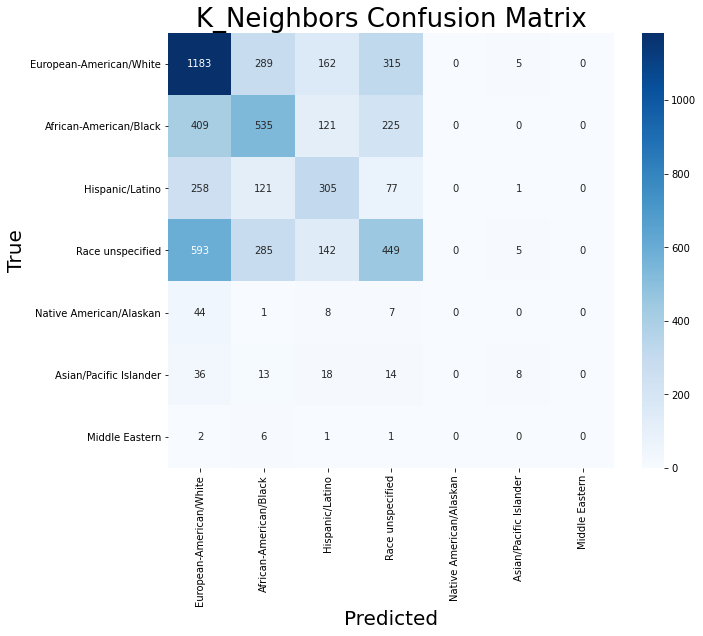

In [73]:
# Plot the confusion Matrix
plt.figure(figsize=(10,8))

sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True', size=20)
plt.xlabel('Predicted', size=20)
plt.title('K_Neighbors Confusion Matrix', size=26)

plt.savefig("./confusion_matrix.png", bbox_inches='tight')

This confusion matrix shows the model is very poor at predicting Native American/Alaskan, Asian/Pacific Islander and Middle Eastern. It most often classifies those individuals as European-American/White. The Race Unspecified catagory was the most difficult to predict, which seems reasonable. Unspecified individuals might actually be correctly catagorized and we wouldn't actually know.

## Create A Figure

In [96]:
import matplotlib.pyplot as plt

In [124]:
my_states = ['CA', 'IL', 'NY', 'FL', 'LA', 'TX', 'MD']

In [125]:
race_color = ['blue','red','purple','gray','green','orange','black']

In [126]:
# This gets me the data I want, but it is multiIndexed and I need to get the data.
death_counts = fatal.groupby(by='Race')['State'].value_counts()

In [127]:
# Begin removing the multiIndex
dc = pd.DataFrame(death_counts).unstack().fillna(0).copy()

In [128]:
dc = dc.droplevel(level=0, axis=1).copy()

In [129]:
# Almost at a clean Data Frame
dc_plot = dc[my_states].copy()

In [130]:
# There is probably another way to get this data into a list. But this is the way I found.
dc_plot[dc_plot.index=='Middle Eastern'].to_numpy().tolist()[0]

[14.0, 3.0, 1.0, 5.0, 1.0, 10.0, 1.0]

In [131]:
my_races = list(dc_plot.index)
my_races

['African-American/Black',
 'Asian/Pacific Islander',
 'European-American/White',
 'Hispanic/Latino',
 'Middle Eastern',
 'Native American/Alaskan',
 'Race unspecified']

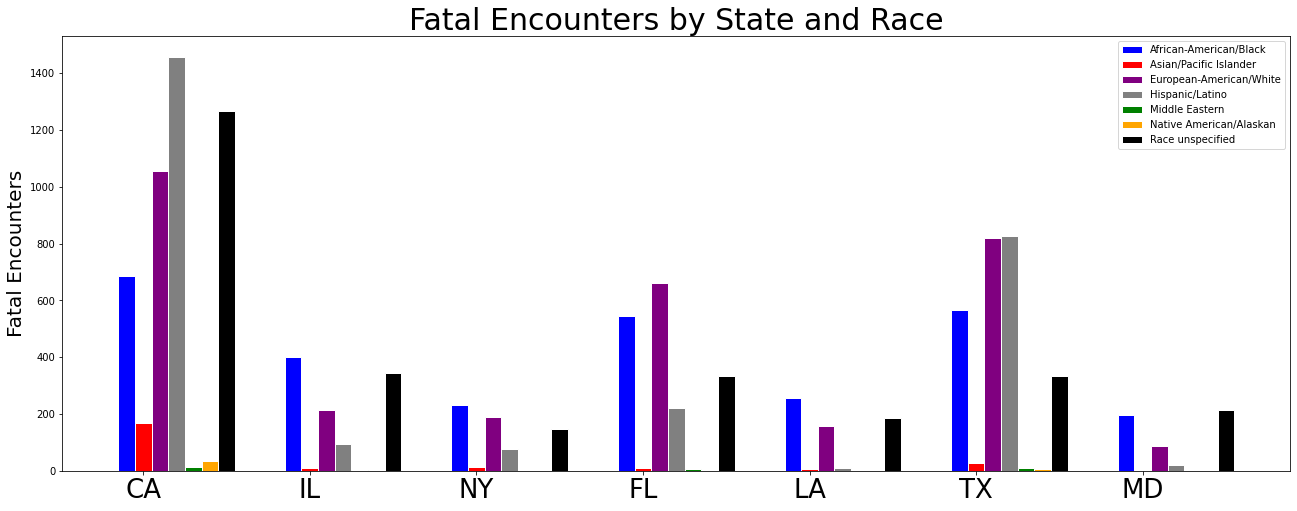

In [139]:
# Graph style shamelessly stolen from:
# https://python-graph-gallery.com/11-grouped-barplot/

# set width of bar
barWidth = 0.1
 
# Set position of bar on X axis
bar_pos = []
for i in range(len(my_states)):
    this_bar = [x + barWidth*i for x in range(len(my_states))]
    bar_pos.append(this_bar)

# Make the plot
plt.figure(figsize=(22,8))
for i, race in enumerate(my_races):
    plt.bar(bar_pos[i], dc_plot[dc_plot.index==race].to_numpy().tolist()[0], color=race_color[i], width=barWidth, edgecolor='white', label=race)

# Add xticks labels and title
plt.title('Fatal Encounters by State and Race', size=30)
plt.ylabel('Fatal Encounters', size=20)
plt.xticks([r + barWidth for r in range(len(my_states))], my_states, size=26)


 
# Create legend & Show graphic
plt.legend()

plt.savefig("./death_by_state.png", bbox_inches='tight')
plt.show()